In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder


In [2]:
df_music=pd.read_csv('/Users/mateomp999/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Work/BIP/BIP MUSIC CASO/DATA.csv', error_bad_lines=False, sep=';')
df_music
# se perdieron 197 filas danadas

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3967602383.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_music=pd.read_csv('/Users/mateomp999/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Work/BIP/BIP MUSIC CASO/DATA.csv', error_bad_lines=False, sep=';')


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.000,0.2120,...,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,NaN,NaN,NaN,NaN
1,In The Hall Of The Mountain King from Peer Gyn...,Op. 46,London Symphony Orchestra,1806234,british orchestra,0.475,0.13,7.0,-17.719,1.0000,...,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,NaN,NaN,NaN
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.000,0.1170,...,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,NaN,NaN,NaN,NaN
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.000,0.0314,...,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,NaN,NaN,NaN,NaN
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.000,0.0444,...,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.000,0.0331,...,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0,NaN,NaN,NaN,NaN
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.000,0.0311,...,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0,NaN,NaN,NaN,NaN
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.000,0.0801,...,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0,NaN,NaN,NaN,NaN


In [3]:
df_music.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

# Clean Data


In [4]:
df_music=df_music[df_music["Unnamed: 22"].isnull()]
df_music

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,NaN,NaN,NaN,NaN
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,NaN,NaN,NaN,NaN
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,NaN,NaN,NaN,NaN
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,NaN,NaN,NaN,NaN
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,2qXicQG06oT0ijKBznpgQv,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0,NaN,NaN,NaN,NaN
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0,NaN,NaN,NaN,NaN
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0,NaN,NaN,NaN,NaN


In [5]:
df_music.drop(columns=['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)
df_music

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3263338348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music.drop(columns=['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,0.2370,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,0.1200,0.454,136.055,audio_features,2qXicQG06oT0ijKBznpgQv,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0


### Drop Null rows

In [6]:
print(df_music["trackName"].isnull().sum())

0


In [7]:
df_music[df_music["id"] == "22lJaG2yxlSjIwdUIddcFk"]


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.137,...,0.237,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
5045,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.137,...,0.237,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0


In [8]:
print(df_music["danceability"].isnull().sum())

540


### Set Index



In [9]:
# set id as index
df_music.set_index('id', inplace=True)

# Drop all rows with duplicate indices
df_music = df_music[~df_music.index.duplicated(keep='first')]

df_music

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,,,
7dTxqsaFGHOXwtzHINjfHv,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.0,0.2570,0.577,162.139,audio_features,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
7K9Z3yFNNLv5kwTjQYGjnu,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.0,0.3660,0.509,132.012,audio_features,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3koAwrM1RO0TGMeQJ3qt9J,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.203,0.1190,0.896,120.969,audio_features,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4ByEFOBuLXpCqvO1kw8Wdm,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.000169,0.0625,0.507,124.945,audio_features,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
22lJaG2yxlSjIwdUIddcFk,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,2.05e-05,0.2370,0.645,157.475,audio_features,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4D7ERaKgv8NAeck8RzUtRz,Younger,Jonas Blue,2560215,pop,0.784,0.845,3.0,-2.793,1.0,0.0596,...,1.59e-05,0.0740,0.888,105.981,audio_features,spotify:track:4D7ERaKgv8NAeck8RzUtRz,https://api.spotify.com/v1/tracks/4D7ERaKgv8NA...,https://api.spotify.com/v1/audio-analysis/4D7E...,194721.0,4.0
2qXicQG06oT0ijKBznpgQv,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,0.0,0.1200,0.454,136.055,audio_features,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0
6o8pM5reLgjd5i8gDY3Irt,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.00572,0.1100,0.245,131.118,audio_features,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0


In [10]:
orginal_columns=df_music.columns


# Feature Creations 

### trackName

In [11]:
# Length of the track Name
df_music['trackName_length']=df_music["trackName"].str.len()


/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2921330234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_length']=df_music["trackName"].str.len()


In [12]:
# Number of words 
df_music['trackName_numberOfWords'] =df_music['trackName'].apply(lambda x: len(x.split()))


/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/1800294371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_numberOfWords'] =df_music['trackName'].apply(lambda x: len(x.split()))


In [13]:
# Number of letters in the longest word 
df_music['trackName_longestWord']=df_music['trackName'].apply(lambda x:len(max(x.split(), key=len)))

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/425450482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_longestWord']=df_music['trackName'].apply(lambda x:len(max(x.split(), key=len)))


In [14]:
# Number of letters in the smallest word 
df_music['trackName_smallestWord']=df_music['trackName'].apply(lambda x:len(min(x.split(), key=len)))

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/1650172900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_smallestWord']=df_music['trackName'].apply(lambda x:len(min(x.split(), key=len)))


In [15]:
# Function to check for special characters in the artist name
def has_special_characters(name):
    pattern = r'[^\w\s]'
    return bool(re.search(pattern, name))

# Create a new column 'has_special_characters' with boolean values
df_music['trackName_has_special_characters'] = df_music['trackName'].apply(has_special_characters)

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3627258278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_has_special_characters'] = df_music['trackName'].apply(has_special_characters)


In [16]:
# List of keywords, need to improve the list of words
english_keywords = [
    'dance', 'party', 'energy', 'vibe', 'upbeat', 'hit', 'groove', 'club', 
    'fun', 'beats', 'catchy', 'funky', 'rhythm', 'banger', 'hot', 'trendy', 
    'viral', 'hype', 'popular', 'chart', 'pump', 'jam', 'dancing', 'electro', 
    'fiesta', 'celebrate', 'cheer', 'happy', 'exciting', 'dynamic', 'bouncy', 
    'fresh', 'catchy', 'radio', 'addictive', 'anthem', 'catchiness', 'trend', 
    'euphoric', 'rave', 'rhythmic', 'rhythmical', 'melodic', 'contagious', 
    'chart-topping', 'top', 'mainstream', 'pop', 'festive', 'vibrant', 'dynamic', 
    'rhythmic', 'pumping', 'punchy', 'infectious', 'lively', 'uplifting', 'driving',
    'chartbuster', 'crowd-pleaser', 'groovy', 'feel-good', 'foot-tapping', 'hitmaker',
    'clubbing', 'energetic', 'sensational', 'hip', 'trending', 'smash', 'climbing', 
    'vogue', 'in-demand', 'stirring', 'inspiring', 'rave', 'soaring', 'stimulating', 
    'fire', 'boost', 'escalate', 'success', 'mainstream', 'upward', 'ascend', 'enthralling',
    'top-tier', 'unstoppable', 'playful', 'electrifying', 'pulsating', 'feel-good',
    'riveting', 'buzz', 'popularity', 'radiant', 'triumph', 'soar', 'rise', 'hit', 
    'captivating', 'soaring', 'uplifting', 'bubbling', 'upbeat', 'pumping', 'striking',
    'rhythmic', 'uplifting', 'exciting', 'memorable', 'catchy', 'groovy', 'fiery', 
    'driving', 'triumphant', 'thrilling', 'enthralling', 'amazing', 'stunning', 
    'electrifying', 'wonderful', 'uplifting', 'magnetic', 'appealing', 'superb',
    'vibrant', 'fascinating', 'addictive', 'exhilarating', 'unforgettable', 'energizing','died'
]

spanish_keywords = [
    'baile', 'fiesta', 'energía', 'vibrante', 'pegajoso', 'éxito', 'ritmo', 'club', 
    'diversión', 'latino', 'moderno', 'canción', 'popular', 'tendencia', 'viral', 
    'euforia', 'bailable', 'pegar', 'ritmo', 'caliente', 'movimiento', 'joven', 'alegre', 
    'emocionante', 'discoteca', 'celebrar', 'contento', 'dinámico', 'contagioso', 
    'bailar', 'estimulante', 'exaltante', 'enganchado', 'funky', 'rítmico', 'éxito', 
    'electrónico', 'pegajoso', 'vibrar', 'contagioso', 'rave', 'radio', 'atractivo', 
    'festivo', 'vibrante', 'contagiante', 'movido', 'bailongo', 'pop', 'latino', 
    'festividad', 'triunfo', 'eufórico', 'moderno', 'bailongo', 'sensacional', 
    'exitazo', 'adictivo', 'contagiar', 'festival', 'moda', 'trending', 'fuego', 
    'escalar', 'éxito', 'ascenso', 'arrojar', 'triunfante', 'emocionante', 'apasionante', 
    'magnífico', 'emocionante', 'vibrante', 'exitoso', 'fascinante', 'vibrante', 
    'entretenido', 'electrizante', 'irresistible', 'trascendente', 'unión', 'radiante', 
    'maravilloso', 'júbilo', 'mágico', 'triunfador', 'triunfar', 'éxito', 'captivante', 
    'exhilarante', 'inolvidable', 'euforizante', 'arrollador', 'maravilloso', 'jubiloso', 
    'magnético', 'atractivo', 'superior', 'emocionante', 'sorprendente', 'éxito', 'vibrante', 
    'electrizante', 'estimulante', 'magnífico', 'impresionante', 'apasionante', 'vibrante', 
    'exitoso', 'arrollador', 'exhilarante', 'inolvidable', 'fascinante', 'emocionante', 
    'envolvente', 'irresistible', 'trascendente', 'euforia', 'triunfo', 'éxito', 'emoción',
    'sorprendente', 'exquisito', 'impresionante', 'impresionante', 'espectacular', 'maravilla',
    'emocional', 'fascinante', 'éxito', 'vibrante', 'vital', 'exitoso', 'estelar', 'mágico',
    'entusiasta', 'inspirador', 'inspirar', 'triunfante', 'emocionante', 'sorprendente', 'asombroso'
]

# Function to check if any keyword is present in the trackName
def check_keywords(name):
    name = name.lower()
    return any(keyword in name.split() for keyword in english_keywords + spanish_keywords)

# Create a new column 'has_keyword' with boolean values
df_music['trackName_has_keyword'] = df_music['trackName'].apply(check_keywords)

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2418831231.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_has_keyword'] = df_music['trackName'].apply(check_keywords)


### artistName

In [17]:
# Length of the track Name
df_music['artistName_length']=df_music["artistName"].str.len()

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/4264659160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_length']=df_music["artistName"].str.len()


In [18]:
# Number of words 
df_music['artistName_numberOfWords'] =df_music['artistName'].apply(lambda x: len(x.split()))

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/1600723871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_numberOfWords'] =df_music['artistName'].apply(lambda x: len(x.split()))


In [19]:
# Number of letters in the longest word 
df_music['artistName_longestWord']=df_music['artistName'].apply(lambda x:len(max(x.split(), key=len)))

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3476672357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_longestWord']=df_music['artistName'].apply(lambda x:len(max(x.split(), key=len)))


In [20]:
# Number of letters in the smallest word 
df_music['artistName_smallestWord']=df_music['artistName'].apply(lambda x:len(min(x.split(), key=len)))

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3401808633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_smallestWord']=df_music['artistName'].apply(lambda x:len(min(x.split(), key=len)))


In [21]:
# Function to check for special characters in the artist name
def has_special_characters(name):
    pattern = r'[^\w\s]'
    return bool(re.search(pattern, name))

# Create a new column 'has_special_characters' with boolean values
df_music['artistName_has_special_characters'] = df_music['artistName'].apply(has_special_characters)

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3070623252.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_has_special_characters'] = df_music['artistName'].apply(has_special_characters)


### msPlayed

In [22]:
df_music["msPlayed"].isnull().sum()

0

In [23]:
df_music['msPlayed_numeric'] = pd.to_numeric(df_music['msPlayed'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2141704449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['msPlayed_numeric'] = pd.to_numeric(df_music['msPlayed'], errors='coerce')


In [24]:
df_music['msPlayed_numeric'].describe()

count    4.621000e+03
mean     1.526821e+06
std      5.437993e+06
min      0.000000e+00
25%      1.392240e+05
50%      2.697950e+05
75%      1.196295e+06
max      1.583671e+08
Name: msPlayed_numeric, dtype: float64

### genre

In [25]:
df_music["genre"].isnull().sum()

468

In [26]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the feature
df_music['genre_encode'] = encoder.fit_transform(df_music["genre"])



/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2359003544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['genre_encode'] = encoder.fit_transform(df_music["genre"])


In [27]:
df_music["genre"]

id
7dTxqsaFGHOXwtzHINjfHv                 NaN
7K9Z3yFNNLv5kwTjQYGjnu          glitchcore
3koAwrM1RO0TGMeQJ3qt9J    experimental pop
4ByEFOBuLXpCqvO1kw8Wdm          album rock
22lJaG2yxlSjIwdUIddcFk               alt z
                                ...       
4D7ERaKgv8NAeck8RzUtRz                 pop
2qXicQG06oT0ijKBznpgQv               alt z
6o8pM5reLgjd5i8gDY3Irt            folk-pop
1EoThnDm6kQfB2idIfR30n           sad lo-fi
042Sl6Mn83JHyLEqdK7uI0             art pop
Name: genre, Length: 4621, dtype: object

In [28]:
df_music['genre_encode']

id
7dTxqsaFGHOXwtzHINjfHv    513
7K9Z3yFNNLv5kwTjQYGjnu    261
3koAwrM1RO0TGMeQJ3qt9J    222
4ByEFOBuLXpCqvO1kw8Wdm     15
22lJaG2yxlSjIwdUIddcFk     16
                         ... 
4D7ERaKgv8NAeck8RzUtRz    434
2qXicQG06oT0ijKBznpgQv     16
6o8pM5reLgjd5i8gDY3Irt    229
1EoThnDm6kQfB2idIfR30n    456
042Sl6Mn83JHyLEqdK7uI0     44
Name: genre_encode, Length: 4621, dtype: int64

### danceability

In [29]:
df_music["danceability"].isnull().sum()

1

In [30]:
df_music.dropna(subset=['danceability'], inplace=True)

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3746986709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music.dropna(subset=['danceability'], inplace=True)


In [31]:
df_music['danceability_numeric'] = pd.to_numeric(df_music['danceability'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2206494411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['danceability_numeric'] = pd.to_numeric(df_music['danceability'])


In [32]:
df_music["danceability_numeric"].describe()

count    4620.000000
mean        0.604560
std         0.155515
min         0.000000
25%         0.512000
50%         0.624000
75%         0.714250
max         0.976000
Name: danceability_numeric, dtype: float64

### energy

In [33]:
df_music["energy"].isnull().sum()

0

In [34]:
df_music['energy_numeric'] = pd.to_numeric(df_music['energy'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2968698918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['energy_numeric'] = pd.to_numeric(df_music['energy'])


In [35]:
df_music["energy_numeric"].describe()

count    4620.000000
mean        0.567645
std         0.241173
min         0.001080
25%         0.408750
50%         0.592000
75%         0.754000
max         0.999000
Name: energy_numeric, dtype: float64

### key

In [36]:
df_music["key"].isnull().sum()

0

In [37]:
df_music['key_numeric'] = pd.to_numeric(df_music['key'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/1518090915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['key_numeric'] = pd.to_numeric(df_music['key'])


In [38]:
df_music['key_numeric'].describe()

count    4620.000000
mean        5.241126
std         3.576867
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key_numeric, dtype: float64

### loudness

In [39]:
df_music["loudness"].isnull().sum()

0

In [40]:
df_music['loudness_numeric'] = pd.to_numeric(df_music['loudness'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/776782948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['loudness_numeric'] = pd.to_numeric(df_music['loudness'])


In [41]:
df_music['loudness_numeric'].describe()

count    4620.000000
mean       -8.557138
std         5.236950
min       -42.044000
25%       -10.039750
50%        -7.166000
75%        -5.323500
max         3.010000
Name: loudness_numeric, dtype: float64

### mode

In [42]:
df_music["mode"].isnull().sum()

0

In [43]:
df_music['mode_numeric'] = pd.to_numeric(df_music['mode'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2084903110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['mode_numeric'] = pd.to_numeric(df_music['mode'])


In [44]:
df_music['mode_numeric'].describe()

count    4620.000000
mean        0.612987
std         0.487119
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode_numeric, dtype: float64

### speechiness

In [45]:
df_music["speechiness"].isnull().sum()

0

In [46]:
df_music['speechiness_numeric'] = pd.to_numeric(df_music['speechiness'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3932493218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['speechiness_numeric'] = pd.to_numeric(df_music['speechiness'])


In [47]:
df_music['speechiness_numeric'].describe()

count    4620.000000
mean        0.078607
std         0.080227
min         0.000000
25%         0.036100
50%         0.048200
75%         0.082225
max         0.966000
Name: speechiness_numeric, dtype: float64

### acousticness

In [48]:
df_music["acousticness"].isnull().sum()

0

In [49]:
df_music['acousticness_numeric'] = pd.to_numeric(df_music['acousticness'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/1422065840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['acousticness_numeric'] = pd.to_numeric(df_music['acousticness'], errors='coerce')


In [50]:
df_music['acousticness_numeric'].describe()

count    4619.000000
mean        0.357641
std         0.331797
min         0.000002
25%         0.052500
50%         0.240000
75%         0.653000
max         0.996000
Name: acousticness_numeric, dtype: float64

### instrumentalness

In [51]:
df_music["instrumentalness"].isnull().sum()

0

In [52]:
df_music['instrumentalness_numeric'] = pd.to_numeric(df_music['instrumentalness'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/1235522211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['instrumentalness_numeric'] = pd.to_numeric(df_music['instrumentalness'], errors='coerce')


In [53]:
df_music['instrumentalness_numeric'].describe()

count    4607.000000
mean        0.148555
std         0.308621
min         0.000000
25%         0.000000
50%         0.000024
75%         0.022550
max         0.989000
Name: instrumentalness_numeric, dtype: float64

### liveness


In [54]:
df_music["liveness"].isnull().sum()

0

In [55]:
df_music['liveness_numeric'] = pd.to_numeric(df_music['liveness'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/3650016859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['liveness_numeric'] = pd.to_numeric(df_music['liveness'], errors='coerce')


In [56]:
df_music['liveness_numeric'].describe()

count    4620.000000
mean        0.175133
std         0.130928
min         0.024900
25%         0.096375
50%         0.120000
75%         0.211000
max         0.964000
Name: liveness_numeric, dtype: float64

### valence

In [57]:
df_music["valence"].isnull().sum()

0

In [58]:
df_music['valence_numeric'] = pd.to_numeric(df_music['valence'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/62419954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['valence_numeric'] = pd.to_numeric(df_music['valence'], errors='coerce')


In [59]:
df_music['valence_numeric'].describe()

count    4620.000000
mean        0.435056
std         0.241862
min         0.000000
25%         0.239000
50%         0.409500
75%         0.614000
max         0.986000
Name: valence_numeric, dtype: float64

### tempo

In [60]:
df_music["tempo"].isnull().sum()

0

In [61]:
df_music['tempo_numeric'] = pd.to_numeric(df_music['tempo'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/830113223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['tempo_numeric'] = pd.to_numeric(df_music['tempo'], errors='coerce')


In [62]:
df_music['tempo_numeric'].describe()

count    4620.000000
mean      119.517144
std        29.018079
min         0.000000
25%        97.948250
50%       119.917000
75%       139.864250
max       236.196000
Name: tempo_numeric, dtype: float64

### type

In [63]:
df_music["type"].unique()

array(['audio_features'], dtype=object)

In [64]:
df_music["type"].isnull().sum()

0

### uri

In [65]:
df_music["uri"].str.split(":").str[0].unique()

array(['spotify'], dtype=object)

In [66]:
df_music["uri"].str.split(":").str[1].unique()

array(['track'], dtype=object)

### track_href


In [67]:

df_music["track_href"].str.split("/").str[3].unique()

array(['v1'], dtype=object)

### analysis_url

In [68]:
df_music["analysis_url"].str.split("/").str[4].unique()

array(['audio-analysis'], dtype=object)

### duration_ms

In [69]:
df_music["duration_ms"].isnull().sum()


0

In [70]:
df_music['duration_ms_numeric'] = pd.to_numeric(df_music['duration_ms'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/2280969919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['duration_ms_numeric'] = pd.to_numeric(df_music['duration_ms'], errors='coerce')


In [71]:
df_music['duration_ms_numeric'].describe()

count    4.620000e+03
mean     2.022118e+05
std      7.178076e+04
min      1.002700e+04
25%      1.619402e+05
50%      1.946095e+05
75%      2.295285e+05
max      1.847210e+06
Name: duration_ms_numeric, dtype: float64

### time_signature

In [72]:
df_music["time_signature"].isnull().sum()

0

In [73]:
df_music['time_signature_numeric'] = pd.to_numeric(df_music['time_signature'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_27978/1228681303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['time_signature_numeric'] = pd.to_numeric(df_music['time_signature'], errors='coerce')


In [74]:
df_music['time_signature_numeric'].describe()

count    4620.000000
mean        3.919481
std         0.385392
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature_numeric, dtype: float64

# Model

### correlations

In [75]:
# drop the original columns
df_model=df_music.drop(columns=orginal_columns)


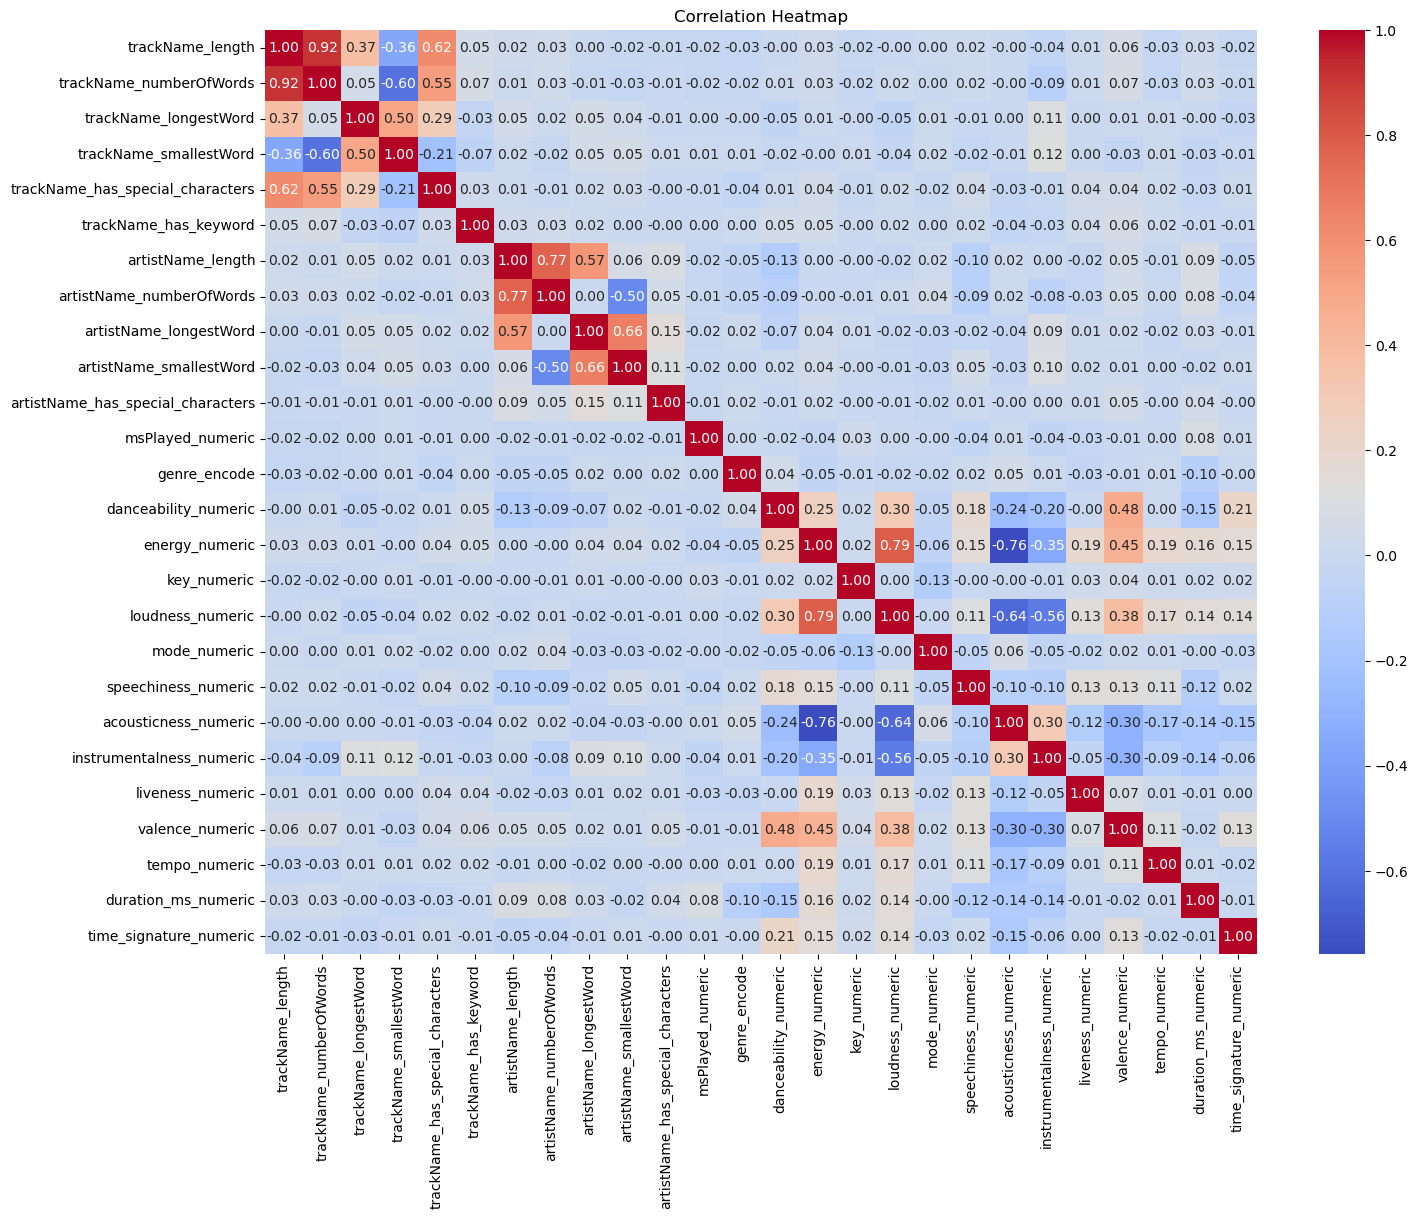

In [76]:
# correlation analisis
correlation_matrix=df_model.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [77]:

df_model.drop(columns=["trackName_length"], inplace=True)


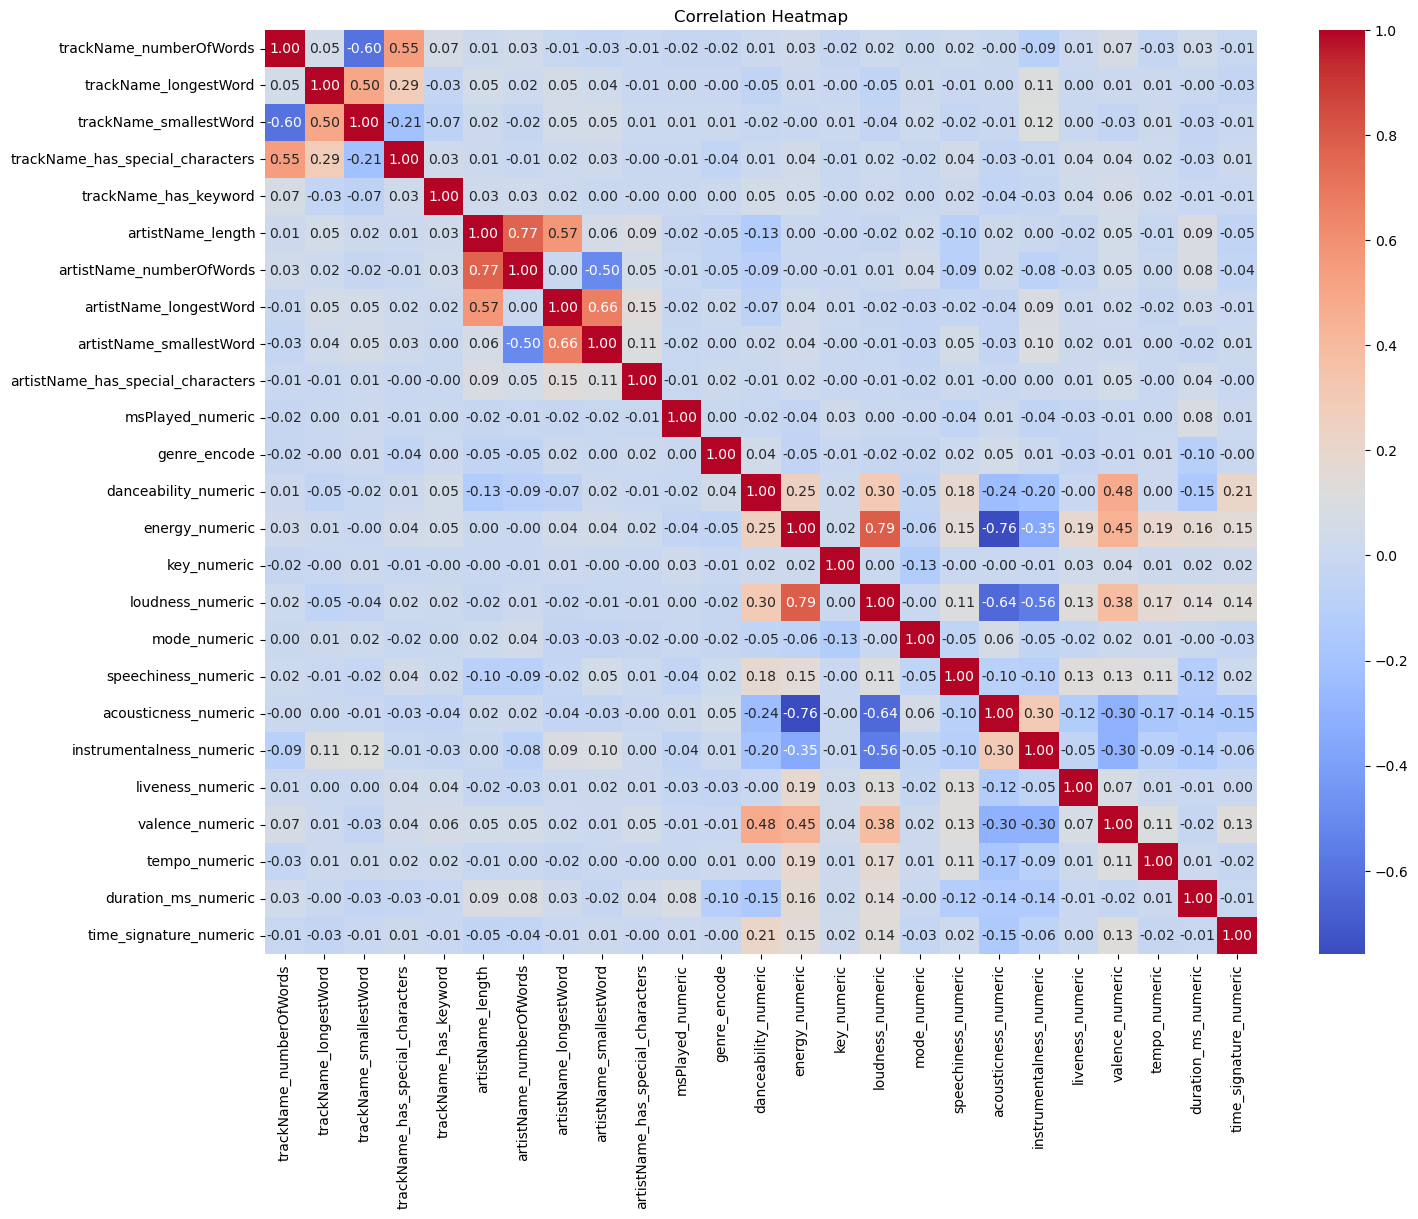

In [78]:
# correlation analisis
correlation_matrix=df_model.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### XGBOOST

In [79]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score




In [80]:
df_model.columns

Index(['trackName_numberOfWords', 'trackName_longestWord',
       'trackName_smallestWord', 'trackName_has_special_characters',
       'trackName_has_keyword', 'artistName_length',
       'artistName_numberOfWords', 'artistName_longestWord',
       'artistName_smallestWord', 'artistName_has_special_characters',
       'msPlayed_numeric', 'genre_encode', 'danceability_numeric',
       'energy_numeric', 'key_numeric', 'loudness_numeric', 'mode_numeric',
       'speechiness_numeric', 'acousticness_numeric',
       'instrumentalness_numeric', 'liveness_numeric', 'valence_numeric',
       'tempo_numeric', 'duration_ms_numeric', 'time_signature_numeric'],
      dtype='object')

#### Danceability as output variable

In [81]:
# Split the data into features (X) and target (y)
X = df_model.drop('danceability_numeric', axis=1)  # Replace 'target_variable' with the name of your target column
y = df_model['danceability_numeric']>0.72


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the XGBoost model
model = xgb.XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data (probability of being positive)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Set a higher threshold to convert probabilities to binary predictions
threshold = 0.8
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1-score:", f1)

Accuracy: 0.8116883116883117
Precision: 0.8
Recall: 0.2882882882882883
Specificity: 0.9772079772079773
F1-score: 0.423841059602649


In [82]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}



# Initialize GridSearchCV
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform grid search on the training data
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

In [83]:
# Split the data into features (X) and target (y)
X = df_model.drop('danceability_numeric', axis=1)  # Replace 'target_variable' with the name of your target column
y = df_model['danceability_numeric']>0.72


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the XGBoost model
best_params = {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300}
model2 = xgb.XGBClassifier(**best_params, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data (probability of being positive)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Set a higher threshold to convert probabilities to binary predictions
threshold = 0.8
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1-score:", f1)

Accuracy: 0.8116883116883117
Precision: 0.8
Recall: 0.2882882882882883
Specificity: 0.9772079772079773
F1-score: 0.423841059602649


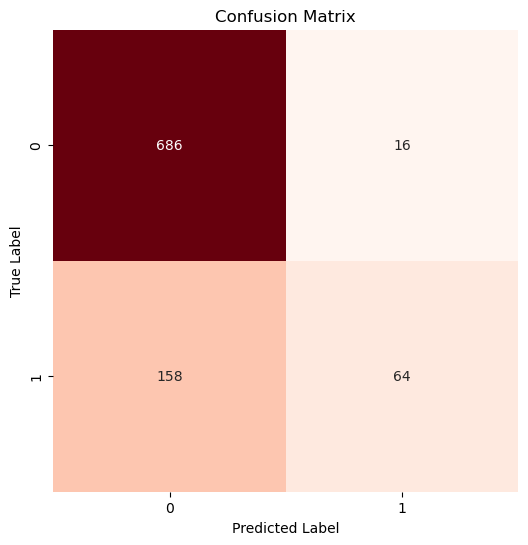

In [84]:
#consfusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", cbar=False, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

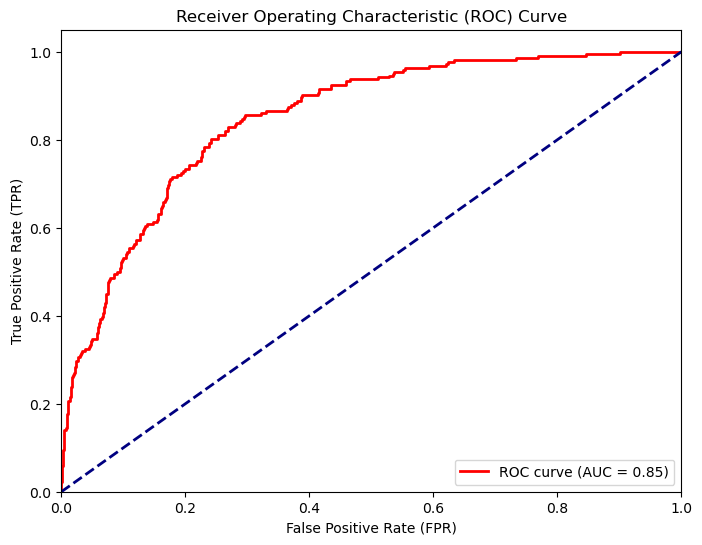

AUC Score: 0.848457431790765


In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

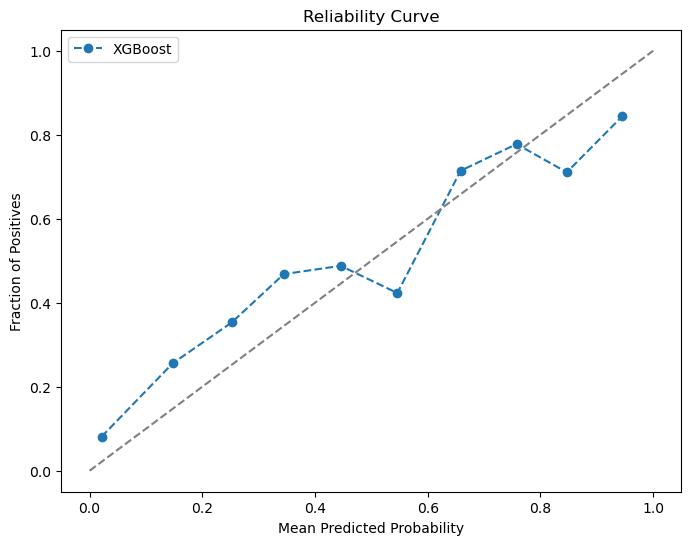

In [112]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10, strategy='uniform')
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', label='XGBoost')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Curve")
plt.legend()
plt.show()

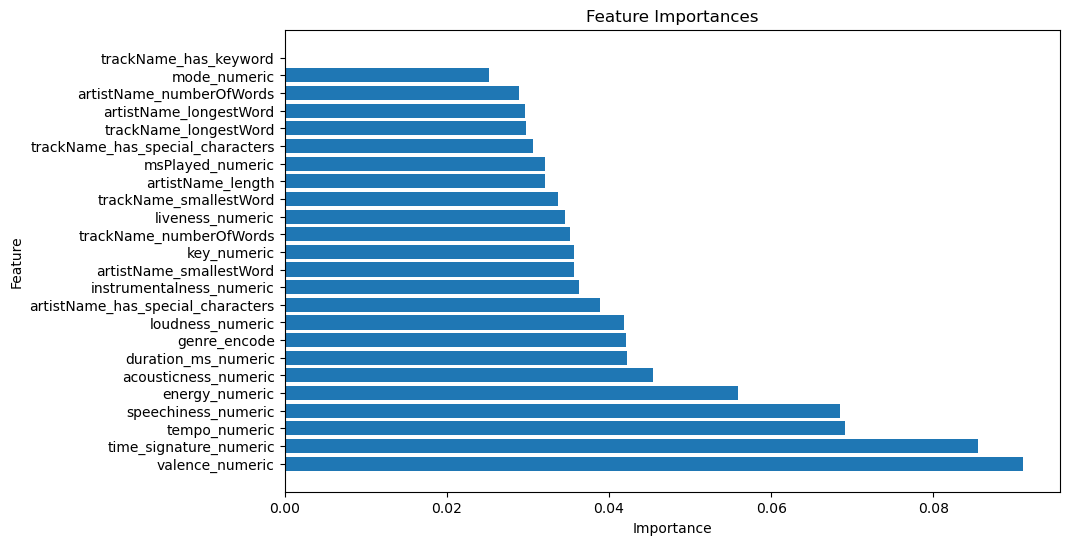

In [86]:
# Assuming you have already trained the XGBoost model and obtained the feature importances
feature_importances = model.feature_importances_

# Get the names of the features (assuming you have them in a list called 'feature_names')
feature_names = X_train.columns.tolist()

# Create a DataFrame to store the feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [87]:
feature_importance_df

,Feature,Importance
20,valence_numeric,0.090990
23,time_signature_numeric,0.085519
21,tempo_numeric,0.069057
16,speechiness_numeric,0.068455
12,energy_numeric,0.055931
17,acousticness_numeric,0.045363
22,duration_ms_numeric,0.042216
11,genre_encode,0.042066
14,loudness_numeric,0.041802
9,artistName_has_special_characters,0.038924


##### Model Statistics

In [88]:
# Filter the input variables for the data points where danceability is predicted to be true
X_true_danceability = X_test[y_pred_prob > threshold]

# Calculate the mean of the filtered input variables
#[["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]]

mean_of_input_variables = X_true_danceability[["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]].describe()


mean_of_input_variables

,valence_numeric,time_signature_numeric,tempo_numeric,speechiness_numeric,energy_numeric,acousticness_numeric
count,80.00000,80.0,80.000000,80.000000,80.000000,80.000000
mean,0.71790,4.0,116.481813,0.094725,0.631312,0.238542
std,0.20448,0.0,13.292277,0.084315,0.148710,0.208466
min,0.18400,4.0,80.014000,0.029100,0.290000,0.002860
25%,0.53600,4.0,106.347750,0.045525,0.521000,0.076125
50%,0.77250,4.0,116.979000,0.065050,0.632500,0.194500
75%,0.89475,4.0,124.330750,0.096600,0.737750,0.351000
max,0.96800,4.0,149.980000,0.492000,0.944000,0.899000


In [110]:
# Filter the input variables for the data points where danceability is predicted to be true
X_true_danceability = X_test[y_pred_prob > threshold]

# Calculate the mean of the filtered input variables
#[["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]]

mean_of_input_variables = X_true_danceability.mean()


mean_of_input_variables

trackName_numberOfWords              2.734940e+00
trackName_longestWord                6.120482e+00
trackName_smallestWord               4.024096e+00
trackName_has_special_characters     2.168675e-01
trackName_has_keyword                2.409639e-02
artistName_length                    9.686747e+00
artistName_numberOfWords             1.746988e+00
artistName_longestWord               6.084337e+00
artistName_smallestWord              4.734940e+00
artistName_has_special_characters    1.084337e-01
msPlayed_numeric                     1.565520e+06
genre_encode                         2.404578e+02
key_numeric                          5.361446e+00
mode_numeric                         5.783133e-01
speechiness_numeric                  8.300964e-02
instrumentalness_numeric             9.396466e-02
liveness_numeric                     1.745614e-01
valence_numeric                      7.690723e-01
tempo_numeric                        1.221103e+02
duration_ms_numeric                  2.193107e+05


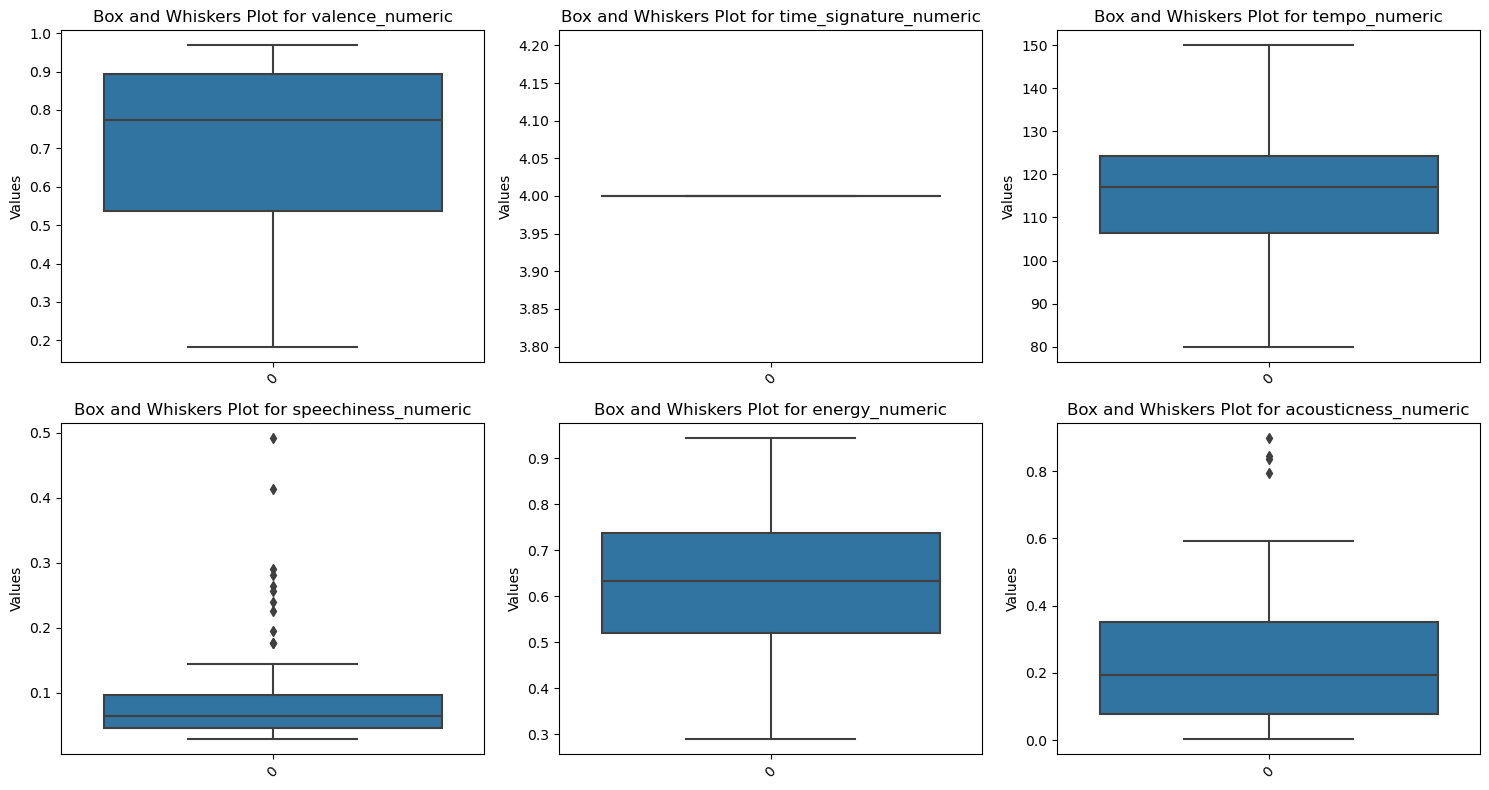

In [89]:
columns_to_plot = ["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]

# Calculate the number of rows and columns for the grid
num_rows = 2
num_cols = len(columns_to_plot) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create an individual box and whiskers plot in the grid
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=X_true_danceability[column], ax=axes[i])
    axes[i].set_title(f'Box and Whiskers Plot for {column}')
    axes[i].set_ylabel('Values')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()

In [90]:
# Filter the input variables for the data points where danceability is predicted to be false
X_true_danceability = X_test[y_pred_prob < threshold]

# Calculate the mean of the filtered input variables
mean_of_input_variables = X_true_danceability.mean()

mean_of_input_variables

trackName_numberOfWords              2.714455e+00
trackName_longestWord                6.409953e+00
trackName_smallestWord               4.138626e+00
trackName_has_special_characters     2.263033e-01
trackName_has_keyword                1.658768e-02
artistName_length                    1.001896e+01
artistName_numberOfWords             1.703791e+00
artistName_longestWord               6.327014e+00
artistName_smallestWord              5.001185e+00
artistName_has_special_characters    5.805687e-02
msPlayed_numeric                     1.515693e+06
genre_encode                         2.513863e+02
energy_numeric                       5.638817e-01
key_numeric                          5.191943e+00
loudness_numeric                    -8.693068e+00
mode_numeric                         6.398104e-01
speechiness_numeric                  7.412180e-02
acousticness_numeric                 3.764982e-01
instrumentalness_numeric             1.444374e-01
liveness_numeric                     1.760441e-01


In [91]:
# Create a new DataFrame with the original 'genre_encoded' and the predicted 'danceability'
predictions_df = pd.DataFrame({'genre_encoded': X_test['genre_encode'], 'predicted_danceability': y_pred})

# Filter the DataFrame to include only rows where danceability is predicted as True
predicted_danceable_songs_df = predictions_df[predictions_df['predicted_danceability'] == True]

# Find the genre that appears the most in the filtered DataFrame
most_common_genre_encoded = predicted_danceable_songs_df['genre_encoded'].mode().values[0]


#Decode the genre
original_genre = encoder.inverse_transform([most_common_genre_encoded])[0]

original_genre

'pop'

In [92]:
predicted_danceable_songs_df.value_counts()


genre_encoded  predicted_danceability
513            1                         9
434            1                         9
223            1                         6
171            1                         5
16             1                         4
466            1                         4
387            1                         3
80             1                         2
130            1                         2
246            1                         1
266            1                         1
295            1                         1
338            1                         1
346            1                         1
372            1                         1
471            1                         1
378            1                         1
240            1                         1
393            1                         1
507            1                         1
440            1                         1
443            1                         1
444            1

In [93]:
encoder.inverse_transform([187])[0]

'desi pop'

##### Data Statistics

In [94]:
df_model[df_model['danceability_numeric']>0.72].mean()

trackName_numberOfWords              2.915349e+00
trackName_longestWord                6.407442e+00
trackName_smallestWord               3.962791e+00
trackName_has_special_characters     2.688372e-01
trackName_has_keyword                3.069767e-02
artistName_length                    9.633488e+00
artistName_numberOfWords             1.660465e+00
artistName_longestWord               6.273488e+00
artistName_smallestWord              5.094884e+00
artistName_has_special_characters    6.790698e-02
msPlayed_numeric                     1.517190e+06
genre_encode                         2.667135e+02
danceability_numeric                 7.877953e-01
energy_numeric                       6.096773e-01
key_numeric                          5.266047e+00
loudness_numeric                    -7.339741e+00
mode_numeric                         5.758140e-01
speechiness_numeric                  1.023843e-01
acousticness_numeric                 2.822710e-01
instrumentalness_numeric             1.018524e-01


In [95]:
df_genre=df_model[df_model['danceability_numeric']>0.72]

most_common_genre_encoded = df_genre['genre_encode'].mode().values[0]


#Decode the genre
original_genre = encoder.inverse_transform([most_common_genre_encoded])[0]

original_genre

nan

#### Energy as output variable

In [96]:
# Split the data into features (X) and target (y)
X = df_model.drop(['energy_numeric', "loudness_numeric", 'acousticness_numeric'], axis=1)  # Replace 'target_variable' with the name of your target column
y = df_model['energy_numeric']>0.75


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the XGBoost model
model = xgb.XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data (probability of being positive)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Set a higher threshold to convert probabilities to binary predictions
threshold = 0.8
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7673160173160173
Precision: 0.6909090909090909
Recall: 0.16101694915254236
F1-score: 0.26116838487972505


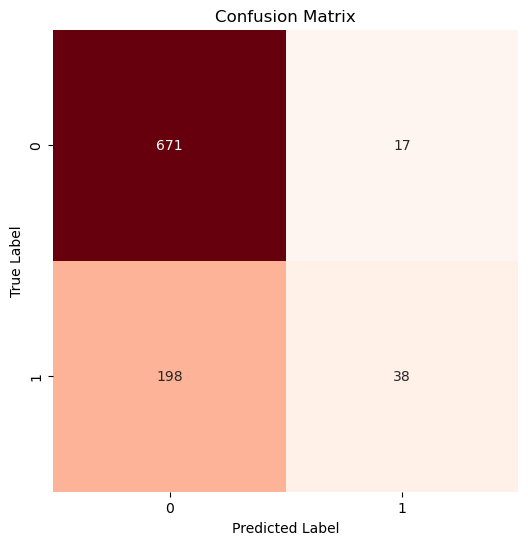

In [97]:
#consfusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", cbar=False, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

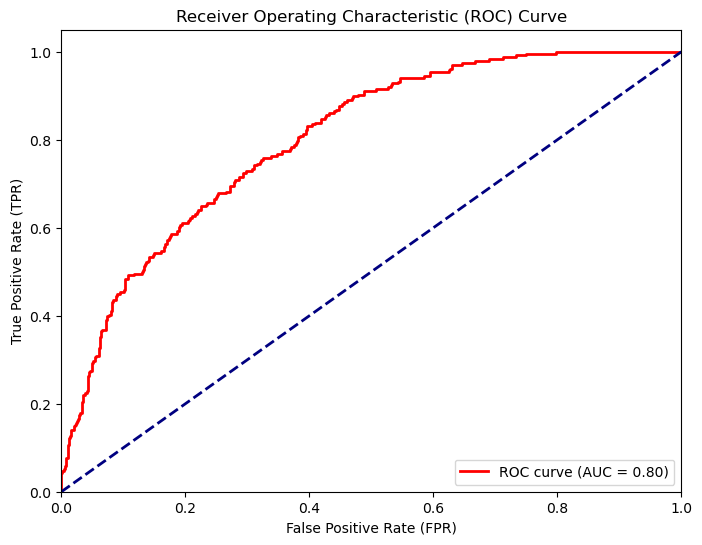

AUC Score: 0.8019129385100513


In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

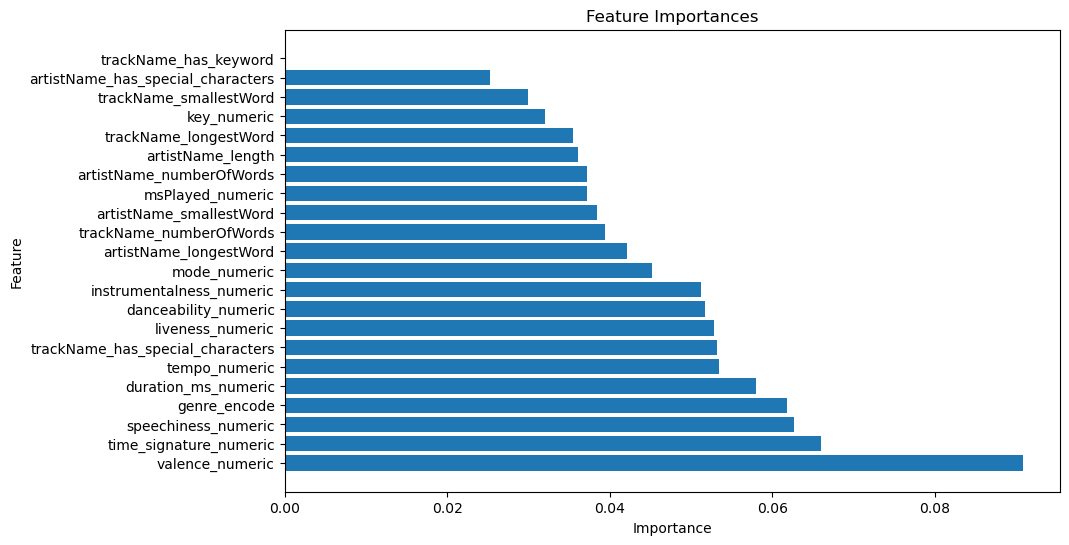

In [99]:
# Assuming you have already trained the XGBoost model and obtained the feature importances
feature_importances = model.feature_importances_

# Get the names of the features (assuming you have them in a list called 'feature_names')
feature_names = X_train.columns.tolist()

# Create a DataFrame to store the feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### Energy and Denceability as output variable I

In [100]:
(df_model['energy_numeric']>0.75) & (df_model['danceability_numeric']>0.72)

id
7dTxqsaFGHOXwtzHINjfHv    False
7K9Z3yFNNLv5kwTjQYGjnu    False
3koAwrM1RO0TGMeQJ3qt9J    False
4ByEFOBuLXpCqvO1kw8Wdm    False
22lJaG2yxlSjIwdUIddcFk    False
                          ...  
4D7ERaKgv8NAeck8RzUtRz     True
2qXicQG06oT0ijKBznpgQv    False
6o8pM5reLgjd5i8gDY3Irt    False
1EoThnDm6kQfB2idIfR30n    False
042Sl6Mn83JHyLEqdK7uI0    False
Length: 4620, dtype: bool

In [101]:
# Split the data into features (X) and target (y)
X = df_model.drop(['energy_numeric','danceability_numeric', "loudness_numeric", 'acousticness_numeric'], axis=1)  # Replace 'target_variable' with the name of your target column
y = (df_model['energy_numeric']>0.65) & (df_model['danceability_numeric']>0.65)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the XGBoost model
model = xgb.XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data (probability of being positive)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Set a higher threshold to convert probabilities to binary predictions
threshold = 0.8
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8051948051948052
Precision: 0.7714285714285715
Recall: 0.135678391959799
F1-score: 0.23076923076923078


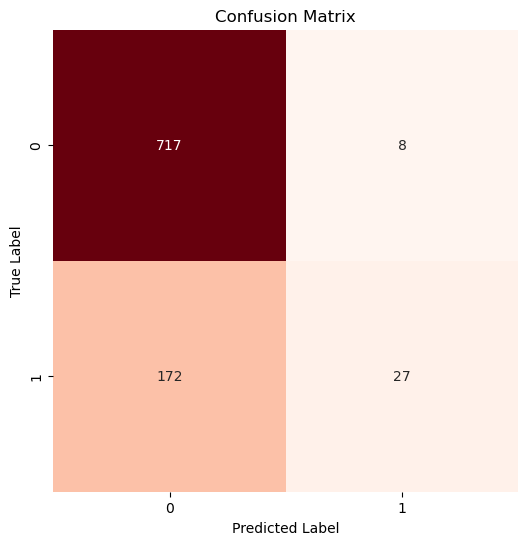

In [102]:
#consfusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", cbar=False, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

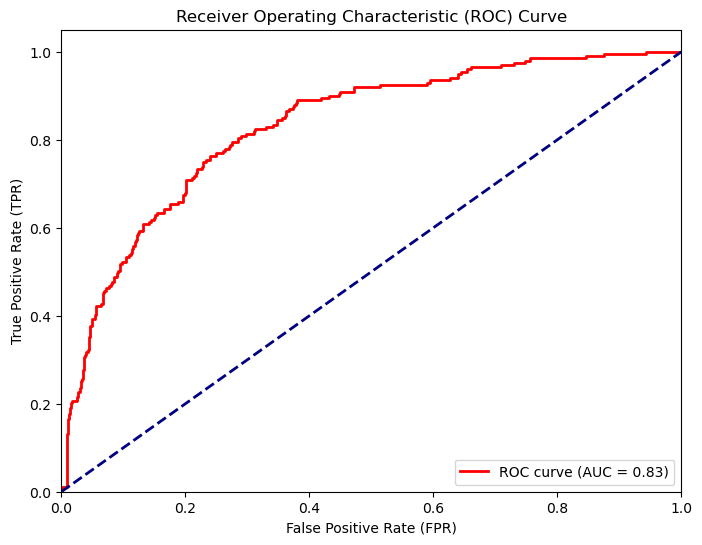

AUC Score: 0.8302893779241032


In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

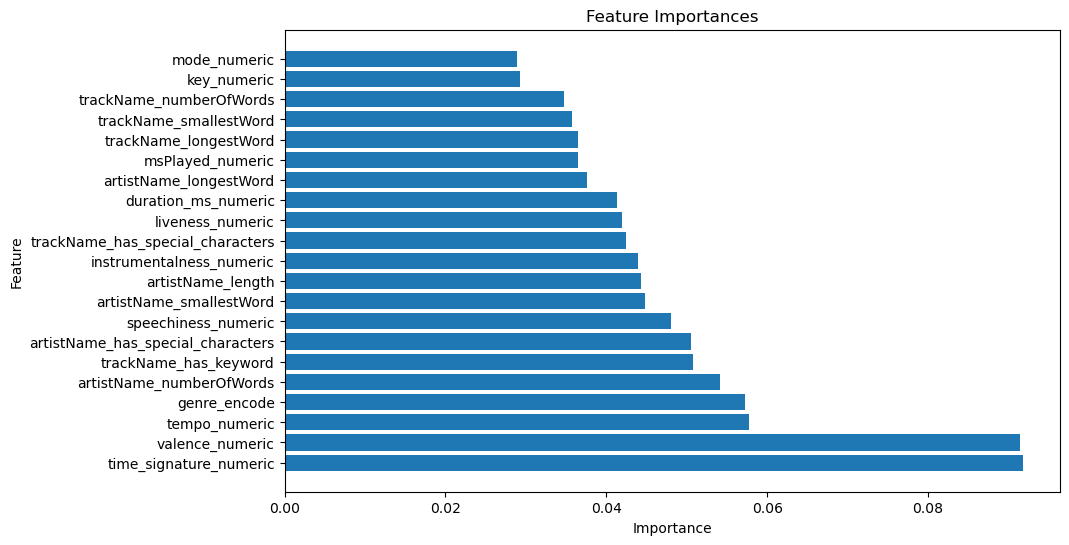

In [104]:
# Assuming you have already trained the XGBoost model and obtained the feature importances
feature_importances = model.feature_importances_

# Get the names of the features (assuming you have them in a list called 'feature_names')
feature_names = X_train.columns.tolist()

# Create a DataFrame to store the feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### Energy and Denceability as output variable II

In [105]:
((df_model['energy_numeric']+df_model['danceability_numeric'])/2)>0.75

id
7dTxqsaFGHOXwtzHINjfHv    False
7K9Z3yFNNLv5kwTjQYGjnu     True
3koAwrM1RO0TGMeQJ3qt9J    False
4ByEFOBuLXpCqvO1kw8Wdm    False
22lJaG2yxlSjIwdUIddcFk    False
                          ...  
4D7ERaKgv8NAeck8RzUtRz     True
2qXicQG06oT0ijKBznpgQv    False
6o8pM5reLgjd5i8gDY3Irt    False
1EoThnDm6kQfB2idIfR30n    False
042Sl6Mn83JHyLEqdK7uI0    False
Length: 4620, dtype: bool

In [106]:
# Split the data into features (X) and target (y)
X = df_model.drop(['energy_numeric','danceability_numeric', "loudness_numeric", 'acousticness_numeric'], axis=1)  # Replace 'target_variable' with the name of your target column
y = ((df_model['energy_numeric']+df_model['danceability_numeric'])/2)>0.7


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the XGBoost model
model = xgb.XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data (probability of being positive)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Set a higher threshold to convert probabilities to binary predictions
threshold = 0.8
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7878787878787878
Precision: 0.7831325301204819
Recall: 0.2674897119341564
F1-score: 0.3987730061349693


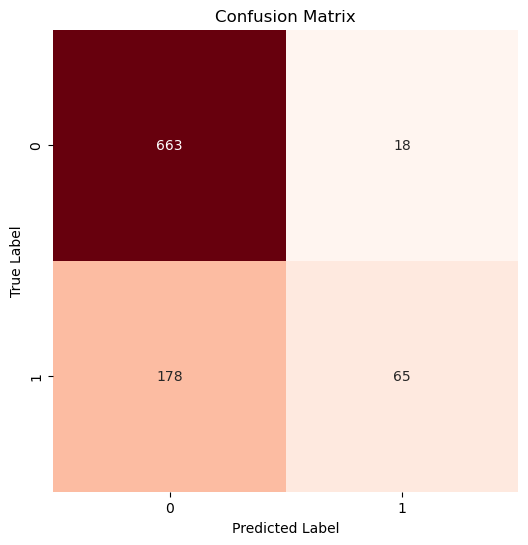

In [107]:
#consfusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", cbar=False, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

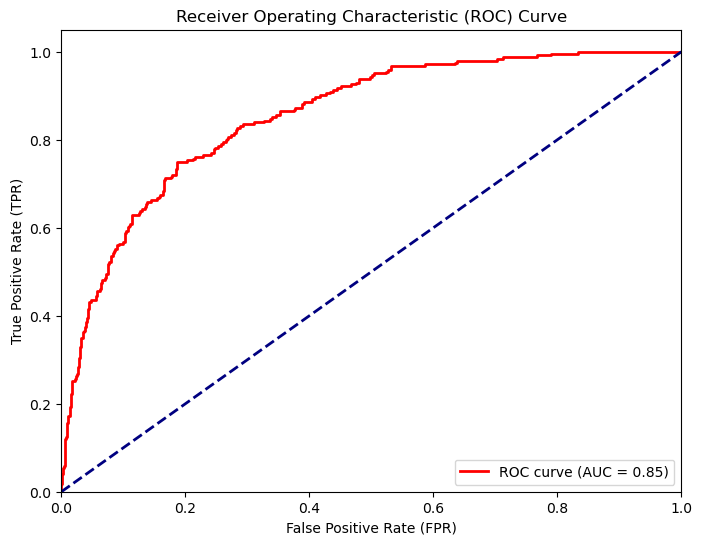

AUC Score: 0.8542750614866783


In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

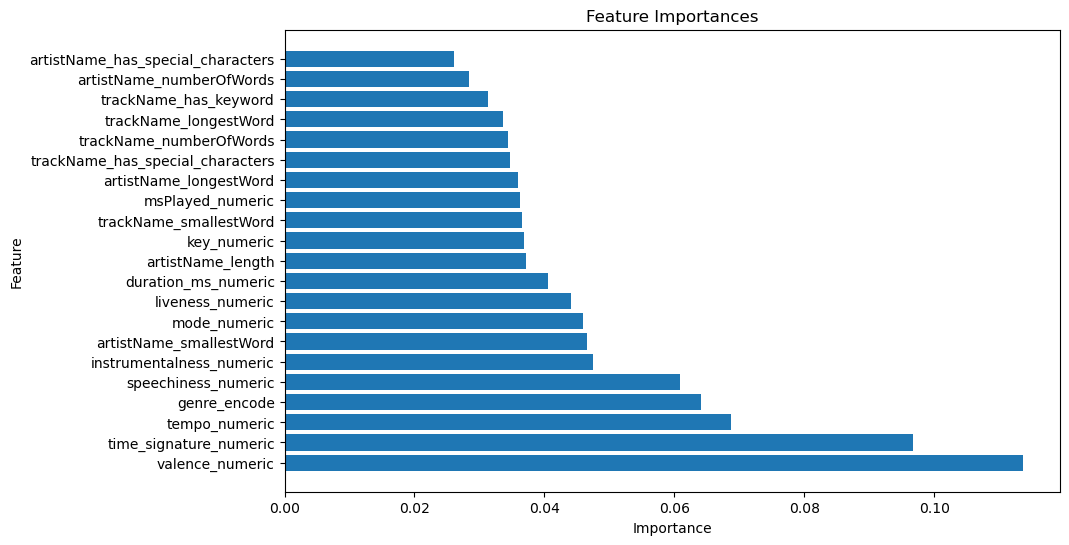

In [109]:
# Assuming you have already trained the XGBoost model and obtained the feature importances
feature_importances = model.feature_importances_

# Get the names of the features (assuming you have them in a list called 'feature_names')
feature_names = X_train.columns.tolist()

# Create a DataFrame to store the feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()